# gym-swarm
# Author: Robert Tjarko Lange
## A simple test installation of the environment

In [1]:
# Install the environment from the command line
!pip install -e .

Obtaining file:///Users/rtl/Dropbox/PHD_ECN/LAB_ROTATION_2_SPREKELER/gym-swarm
  Found existing installation: gym-swarm 0.0.1
    Uninstalling gym-swarm-0.0.1:
      Successfully uninstalled gym-swarm-0.0.1
  Running setup.py develop for gym-swarm


In [2]:
# Run unit tests
!python gym_swarm/tests/test.py

/Users/rtl/anaconda2/envs/swarm/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Users/rtl/anaconda2/envs/swarm/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/rtl/anaconda2/envs/swarm/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/rtl/anaconda2/envs/swarm/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/rtl/Dropbox/PHD_ECN/LAB_ROTATION_2_SPREKELER/gym-swarm/gym_swarm/envs/swarm_env.py:19: ResourceWarning: unclosed file <_io.BufferedReader name='

In [3]:
# Import the environment
import gym
import gym_swarm

# Import base modules
import time
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Make the environment and change the base params
num_agents = 10
obs_space_size=10

env = gym.make("Swarm-v0")
env.set_env_parameters(num_agents, obs_space_size, verbose=True)
state = env.reset()

/Users/rtl/anaconda2/envs/swarm/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Swarm Environment Parameters have been set to:
	 Number of Agents: 10
	 State Space: 10x10 Grid
[0. 6. 3. 6. 4. 6. 4. 2. 6. 8. 8.]


In [5]:
class RandomAgents():
    """
    Class for simple random agents
    """
    def __init__(self, env):
        self.num_actions = env.action_space.n
        self.num_agents = env.num_agents

    def random_action(self):
        random_actions = np.random.randint(8, size=self.num_agents)
        return dict(enumerate(random_actions))

In [6]:
random_agent = RandomAgents(env)
max_steps = 10

[0. 1. 2. 3. 5. 2. 3. 3. 4. 4. 2.]
[0. 2. 3. 3. 5. 3. 3. 4. 3. 5. 3.]
[5 2] [7 2] [1, 0]
Step: 1
Agent-Specific Rewards: {0: 0.5, 1: 0.5, 2: -1.323223304703363, 3: 0.75, 4: -0.38388347648318444, 5: -0.4393398282201788, 6: 0.25, 7: 0.5, 8: 0.323223304703363, 9: -0.17677669529663698, 'global': 0.05}


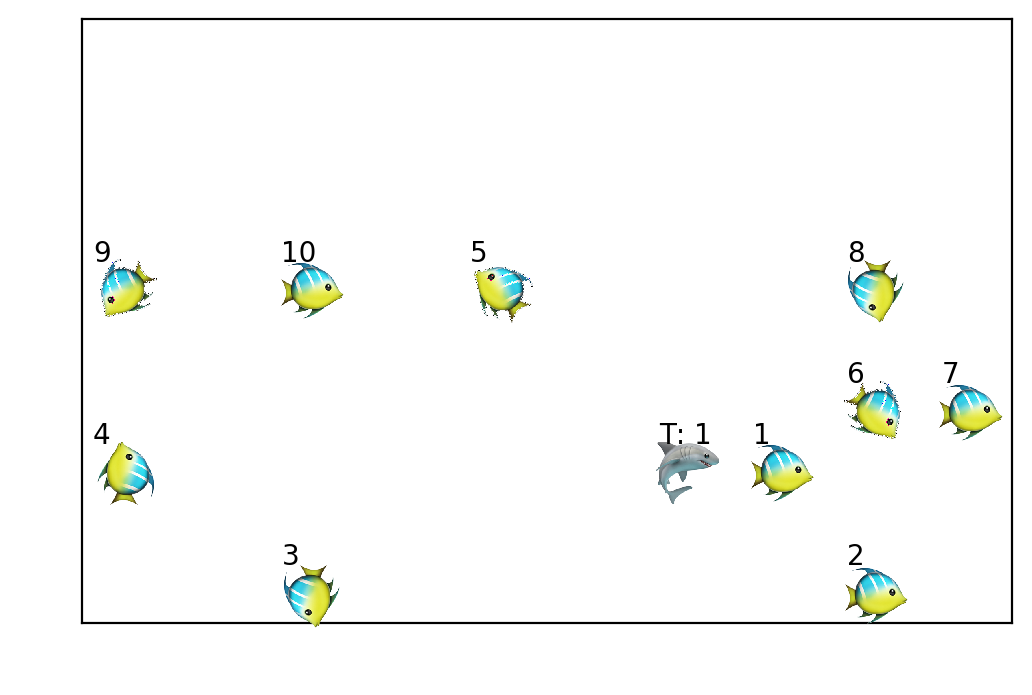

[6 2] [0 2] [-1, 0]
Step: 2
Agent-Specific Rewards: {0: 0.5732233047033632, 1: 0.2803300858899105, 2: 0.0, 3: -1.75, 4: -0.14644660940672605, 5: -1.0, 6: -0.573223304703363, 7: -1.5, 8: 0.75, 9: 0.926776695296637, 'global': -0.24393398282201773}


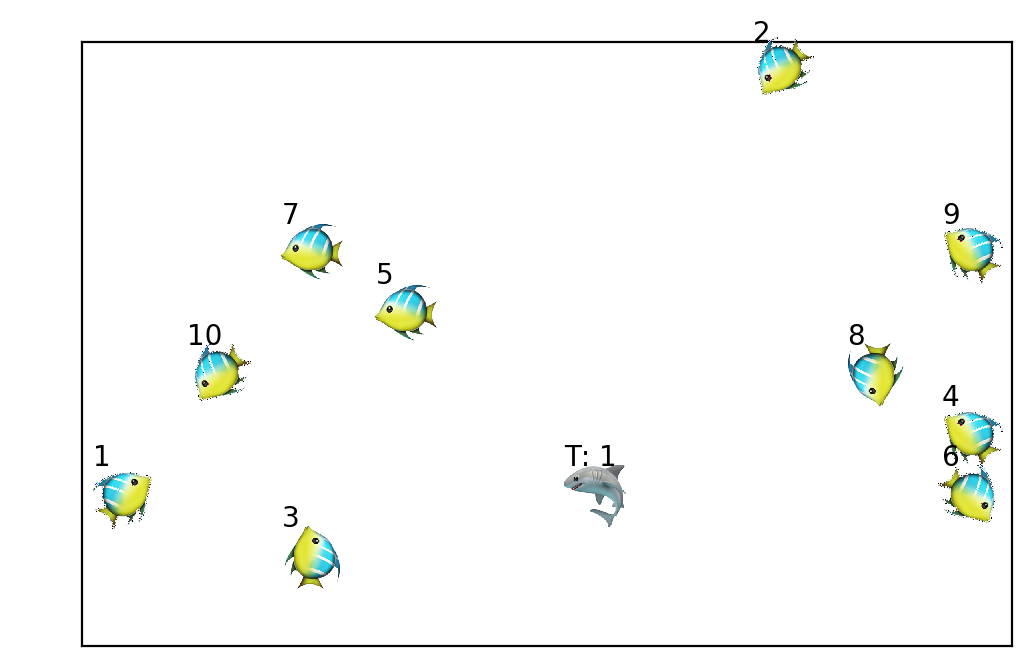

[5 2] [0 1] [-1, -1]
Step: 3
Agent-Specific Rewards: {0: -1.426776695296637, 1: -1.3535533905932735, 2: -1.426776695296637, 3: -1.426776695296637, 4: -0.10355339059327351, 5: -0.926776695296637, 6: -0.646446609406726, 7: -0.14644660940672627, 8: -1.426776695296637, 9: 0.6767766952966368, 'global': -0.820710678118655}


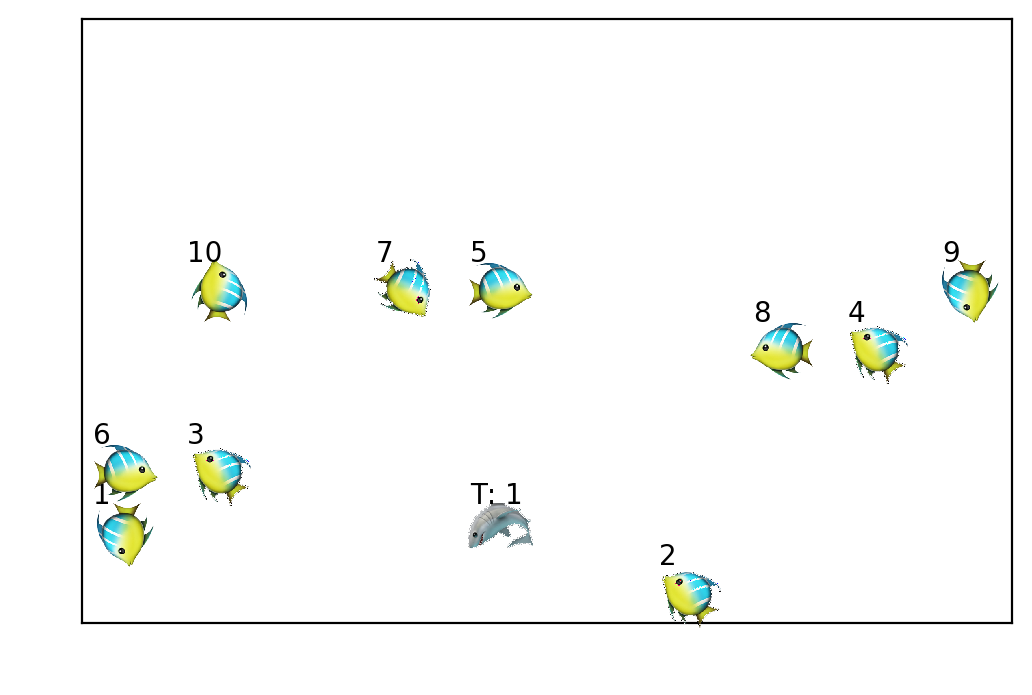

[4 1] [1 0] [-1, -1]
Step: 4
Agent-Specific Rewards: {0: -1.426776695296637, 1: -0.426776695296637, 2: -2.646446609406726, 3: 0.7071067811865475, 4: -0.426776695296637, 5: 0.603553390593274, 6: -0.426776695296637, 7: 0.323223304703363, 8: 1.353553390593274, 9: 1.573223304703363, 'global': -0.07928932188134538}


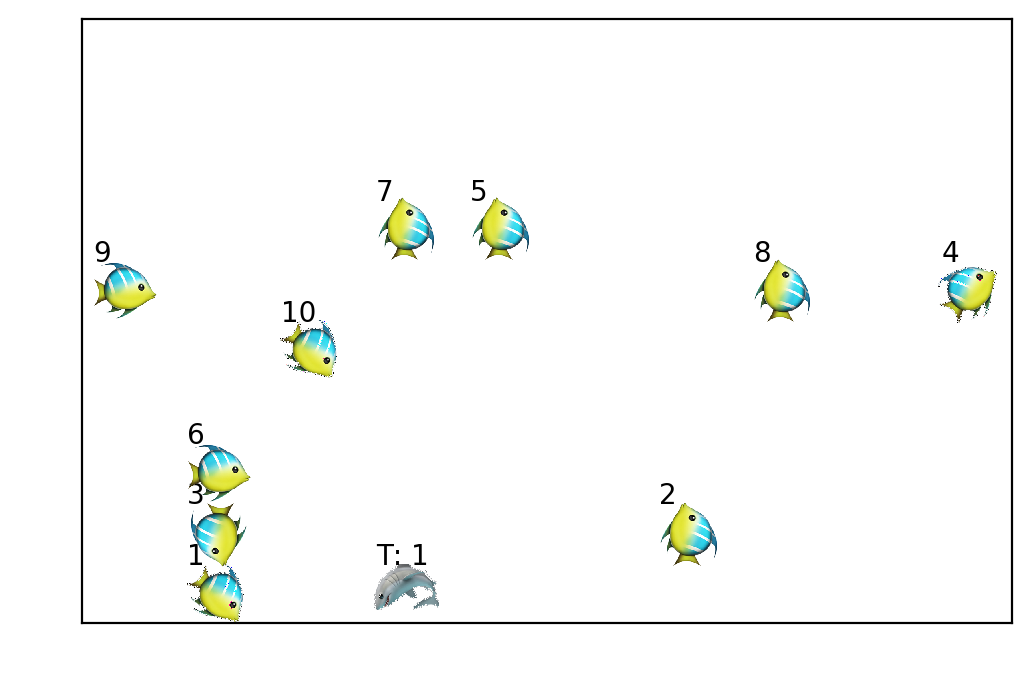

[3 0] [8 1] [1, 1]
Step: 5
Agent-Specific Rewards: {0: -0.853553390593274, 1: -0.896446609406726, 2: 0.6035533905932737, 3: -1.1035533905932737, 4: -0.6767766952966365, 5: -0.42677669529663675, 6: -1.6767766952966365, 7: -1.353553390593274, 8: -1.1035533905932737, 9: 0.42677669529663687, 'global': -0.7060660171779822}


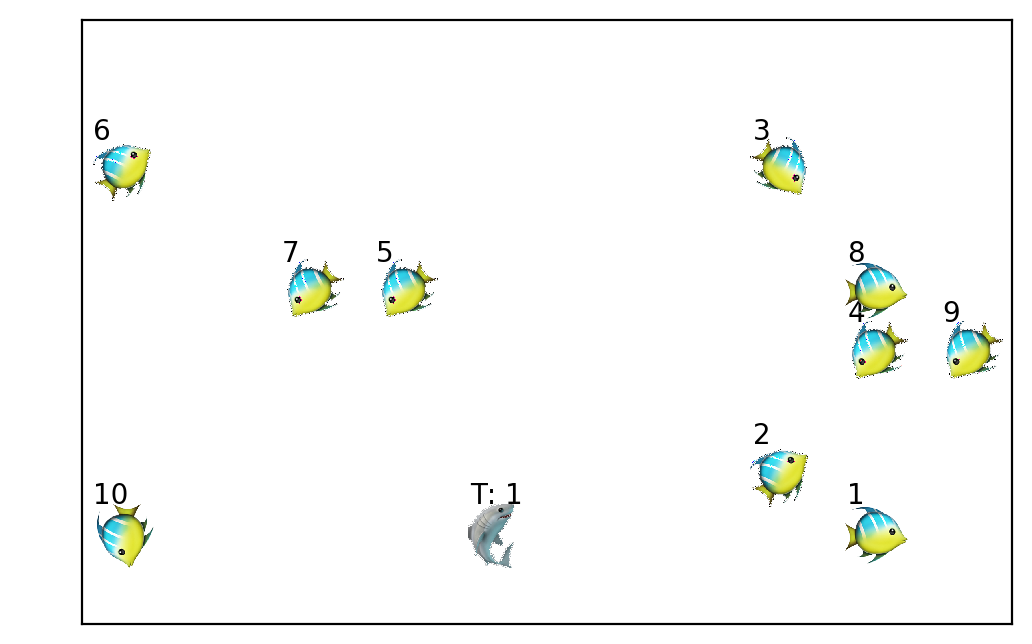

[4 1] [9 0] [1, -1]
Step: 6
Agent-Specific Rewards: {0: -0.17677669529663675, 1: 0.10355339059327395, 2: -0.2803300858899105, 3: -2.1338834764831844, 4: -1.3535533905932737, 5: -0.10355339059327373, 6: -1.103553390593274, 7: -1.603553390593274, 8: -0.10355339059327395, 9: -0.573223304703363, 'global': -0.7328427124746192}


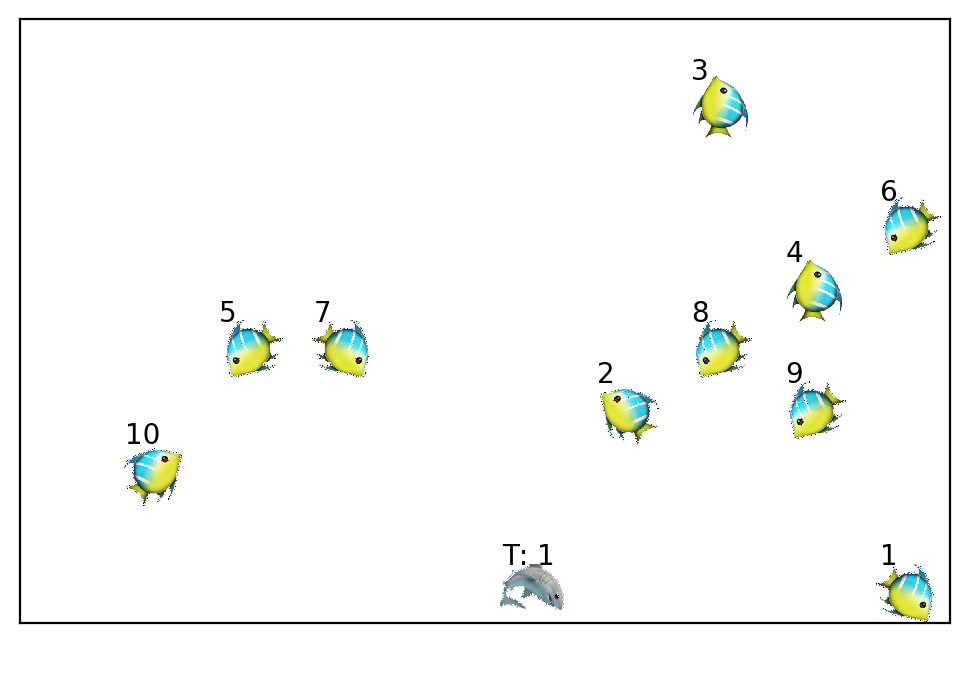

[0. 3. 2. 7. 4. 5. 8. 3. 3. 3. 4.]
[5 0] [7 2] [1, 1]
Step: 7
Agent-Specific Rewards: {0: -1.823223304703363, 1: -3.6767766952966365, 2: -0.07322330470336302, 3: 0.896446609406726, 4: -0.5303300858899105, 5: -0.8964466094067263, 6: 0.853553390593274, 7: 0.926776695296637, 8: -1.9696699141100893, 9: 0.20710678118654746, 'global': -0.6085786437626901}


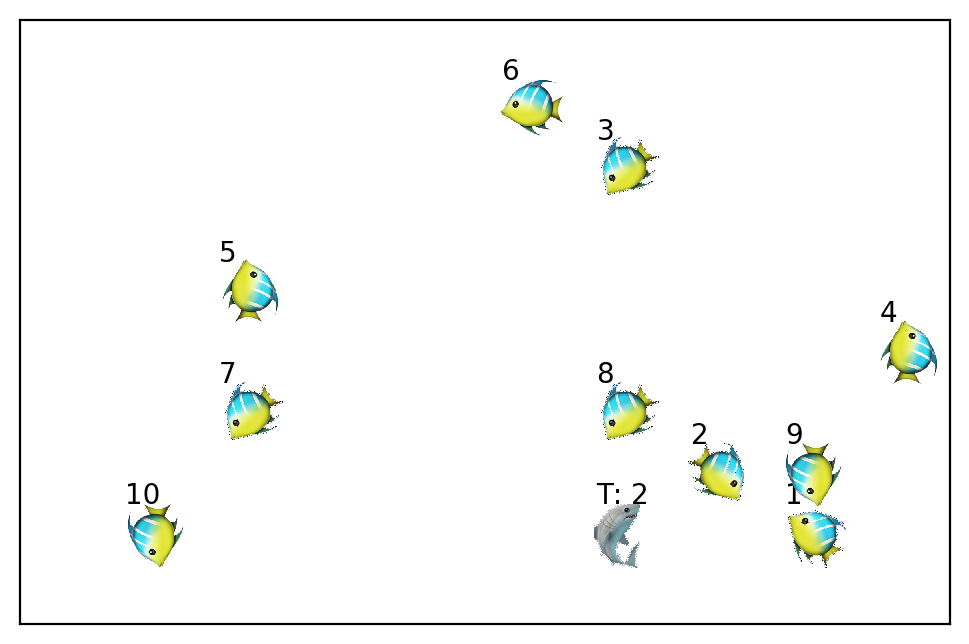

[0. 3. 2. 5. 4. 5. 6. 5. 2. 3. 6.]
[6 1] [8 1] [1, 0]
Step: 8
Agent-Specific Rewards: {0: -0.823223304703363, 1: -0.573223304703363, 2: -0.426776695296637, 3: 0.07322330470336302, 4: -1.073223304703363, 5: -2.176776695296637, 6: -0.676776695296637, 7: 1.5, 8: 0.676776695296637, 9: -1.0, 'global': -0.45}


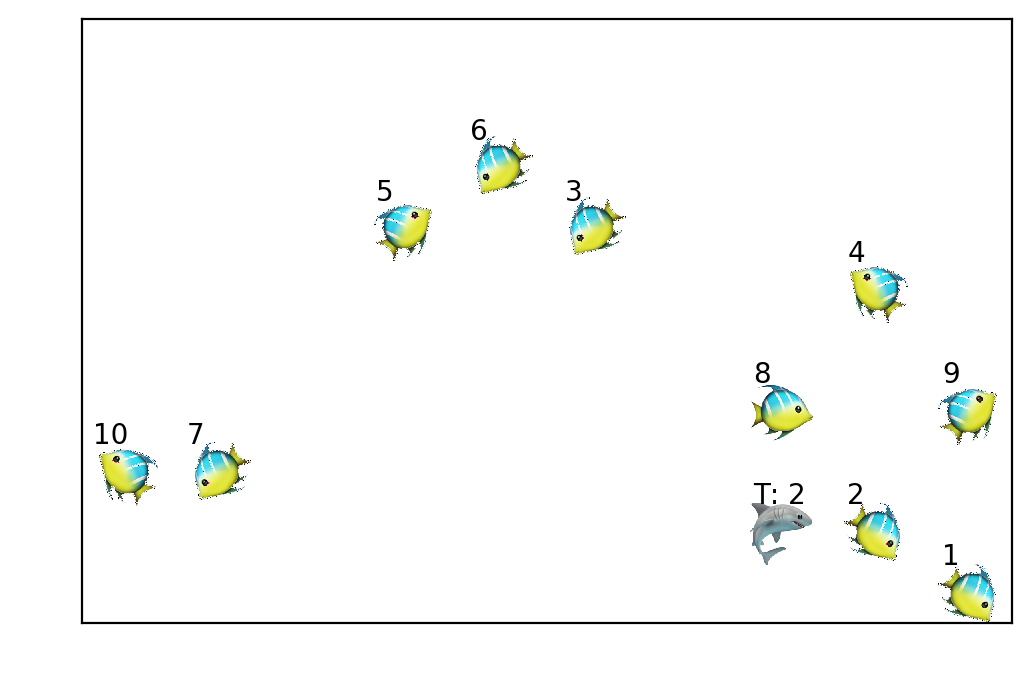

[7 1] [8 0] [1, -1]
Step: 9
Agent-Specific Rewards: {0: 0, 1: -10, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 'global': -10}


/Users/rtl/anaconda2/envs/swarm/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


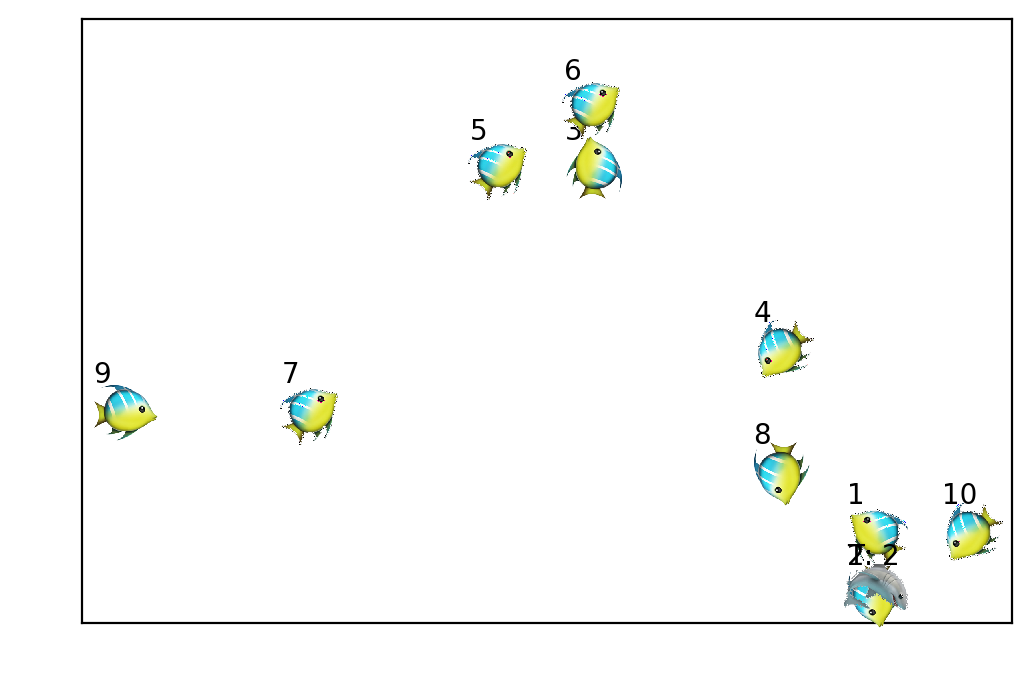

In [11]:
# Run a few steps with the random agent and global reward
state = env.reset()
for i in range(max_steps):
    action = random_agent.random_action()
    next_state, rewards, done, _ = env.step(action, indiv_rewards=True, vf_size=6)
    state = next_state
    print("Step: {}".format(i + 1))
    print("Agent-Specific Rewards: {}".format(rewards))
    env.render()
    if done:
        break

In [ ]:
env = gym.make("Swarm-v0")

agents_list = np.arange(5, 1000, 100).tolist()
num_runs = 5

mean_init_time = np.zeros((len(agents_list)))
sd_init_time = np.zeros((len(agents_list)))

mean_exec_time = np.zeros((len(agents_list)))
sd_exec_time = np.zeros((len(agents_list)))

for i, n_agents in enumerate(agents_list):
    init_time_temp = []
    exec_time_temp = []
    
    for run in range(num_runs):
        start = time.time()
        env.set_env_parameters(num_agents=n_agents,
                               obs_space_size=10000,
                               verbose=False)
        state = env.reset()
        total_init = time.time() - start
        init_time_temp.append(total_init)

        random_agent = RandomAgents(env)
        action = random_agent.random_action()

        start = time.time()
        next_state, reward, done, _ = env.step(action)
        total_exec = time.time() - start
        exec_time_temp.append(total_exec)
    
    mean_init_time[i] = np.array(init_time_temp).mean()
    sd_init_time[i] = np.array(init_time_temp).std()

    mean_exec_time[i] = np.array(exec_time_temp).mean()
    sd_exec_time[i] = np.array(exec_time_temp).std()


In [ ]:
plt.figure(figsize=(12,10))
plt.loglog(agents_list, mean_init_time, label="Initialisation Time")
plt.fill_between(agents_list,
                 mean_init_time - 2*sd_init_time,
                 mean_init_time + 2*sd_init_time,
                 alpha=0.25)

plt.loglog(agents_list, mean_exec_time, label="Step Execution Time")
plt.fill_between(agents_list,
                 mean_exec_time - 2*sd_exec_time,
                 mean_exec_time + 2*sd_exec_time,
                 alpha=0.25)

plt.xlabel("(Log) Number of Agents")
plt.ylabel("(Log) Time in Secs")
plt.title("Scalability of the Swarm Environment")
plt.legend(loc=2)

plt.savefig("gym_swarm/images/scalability.png", dpi=300)